# Importing the packages for data analysis

In [1]:
#!pip install xgboost

# importing packages
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns # to visualise
import missingno as msno

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from datetime import datetime

In [2]:
abalone_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv" )

# Lets look our data

In [3]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


In [4]:
abalone_data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3127,M,0.415,0.315,0.120,0.4015,0.1990,0.0870,0.0970,8
3128,I,0.325,0.240,0.070,0.1520,0.0565,0.0305,0.0540,8
3129,M,0.565,0.455,0.155,0.9355,0.4210,0.1830,0.2600,11
3130,M,0.610,0.485,0.145,1.3305,0.7830,0.2255,0.2865,9
3131,F,0.655,0.505,0.190,1.3485,0.5935,0.2745,0.4250,12


In [5]:
abalone_data.shape

(3132, 9)

In [6]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3132.000000,3132.000000,3132.000000,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.523707,0.407952,0.139277,0.82867,0.359229,0.180731,0.239159,9.947957
std,0.119891,0.099336,0.038991,0.49063,0.221946,0.109924,0.139040,3.230252
min,0.110000,0.090000,0.000000,0.00800,0.002500,0.000500,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.44150,0.185375,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.79950,0.335500,0.170000,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.15300,0.499500,0.252500,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.82550,1.488000,0.760000,1.005000,29.000000


some strange values here:
the min Height is 0,000000 - most likely to be a wrong outlier

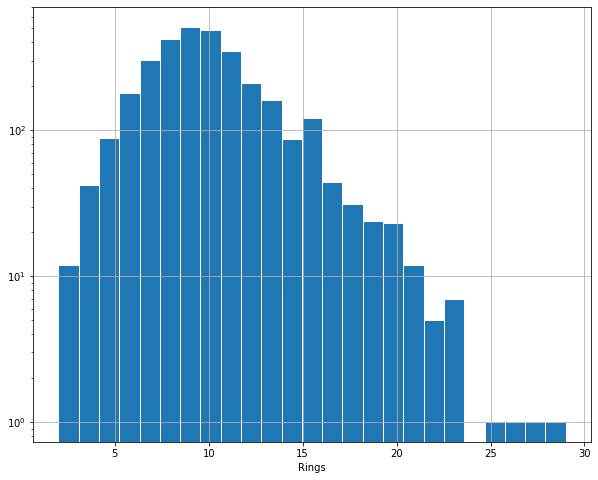

In [7]:
_ = abalone_data['Rings'].hist(bins=25, figsize=(10,8), edgecolor='w', log=True )
plt.xlabel('Rings')
plt.show()

# Droping Outliers

In [8]:
abalone_data[abalone_data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1843,I,0.43,0.34,0.0,0.428,0.2065,0.086,0.115,8


In [9]:
abalone_data = abalone_data[~(abalone_data['Height'] == 0)]

In [10]:
abalone_data[abalone_data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [11]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000
mean,0.523737,0.407973,0.139321,0.828798,0.359277,0.180761,0.239199,9.948579
std,0.119899,0.099345,0.038918,0.490656,0.221964,0.109928,0.139045,3.230581
min,0.110000,0.090000,0.015000,0.008000,0.002500,0.000500,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.442000,0.185250,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.335500,0.170000,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.153000,0.499500,0.252500,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.825500,1.488000,0.760000,1.005000,29.000000


# Let's Take a Look at the Categorical data

In [12]:
abalone_data.nunique()

Sex                  3
Length             133
Diameter           110
Height              48
Whole weight      2036
Shucked weight    1389
Viscera weight     843
Shell weight       830
Rings               26
dtype: int64

In [13]:
abalone_data["Sex"].unique()

array(['F', 'M', 'I'], dtype=object)

# Target Variable check

In [14]:
abalone_data["Rings"].unique()

array([10,  9, 18, 19, 12,  8,  7, 11, 14, 13, 15,  6, 16,  5,  3,  4, 17,
       20, 21, 22, 23, 29, 25, 26,  2, 27])

In [15]:
abalone_data["Rings"].nunique()

26

In [16]:
abalone_data["Rings"].value_counts()

9     513
10    487
8     422
11    351
7     304
12    210
6     181
13    161
5      89
14     87
15     72
16     50
17     44
4      42
18     31
19     24
20     23
21     12
3      11
23      7
22      5
29      1
26      1
27      1
25      1
2       1
Name: Rings, dtype: int64

# Data preparation process: Data Wrangling

## Checking missing value

In [17]:
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

## Duplicate value

In [18]:
abalone_data[abalone_data.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


# Exploratory Data Analysis

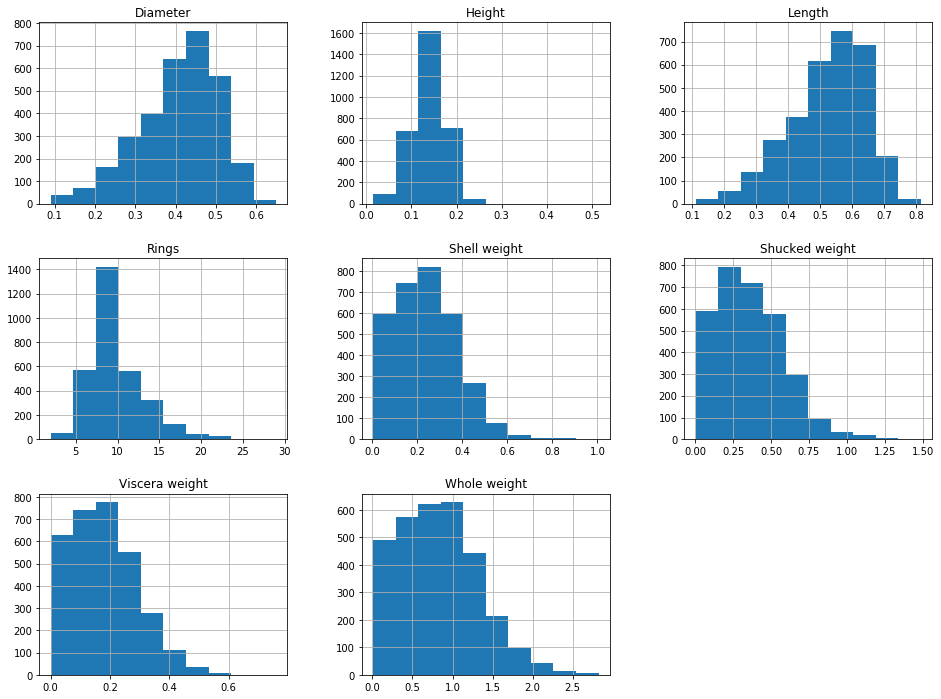

In [19]:
abalone_data.hist(bins=10, figsize=(16,12))
plt.show()

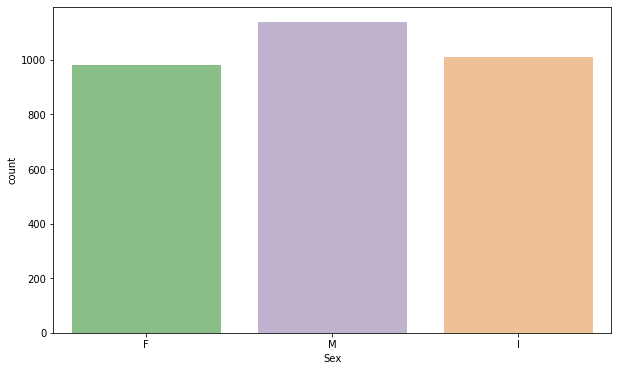

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Sex',data= abalone_data,palette='Accent')

In [21]:
abalone_data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986523,0.891688,0.924704,0.898812,0.901659,0.900551,0.550211
Diameter,0.986523,1.000000,0.898567,0.925127,0.894468,0.898284,0.908236,0.567558
Height,0.891688,0.898567,1.000000,0.881989,0.835559,0.859964,0.882956,0.589874
Whole weight,0.924704,0.925127,0.881989,1.000000,0.971049,0.965631,0.957091,0.534024
Shucked weight,0.898812,0.894468,0.835559,0.971049,1.000000,0.933088,0.887862,0.415326
Viscera weight,0.901659,0.898284,0.859964,0.965631,0.933088,1.000000,0.908029,0.496826
Shell weight,0.900551,0.908236,0.882956,0.957091,0.887862,0.908029,1.000000,0.622295
Rings,0.550211,0.567558,0.589874,0.534024,0.415326,0.496826,0.622295,1.000000


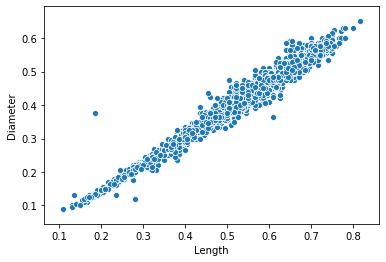

In [22]:
sns.scatterplot(x=abalone_data['Length'], y=abalone_data['Diameter'])

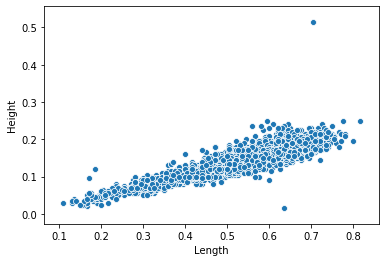

In [23]:
sns.scatterplot(x=abalone_data['Length'], y=abalone_data['Height'])

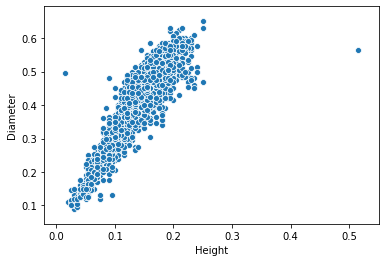

In [24]:
sns.scatterplot(x=abalone_data['Height'], y=abalone_data['Diameter'])

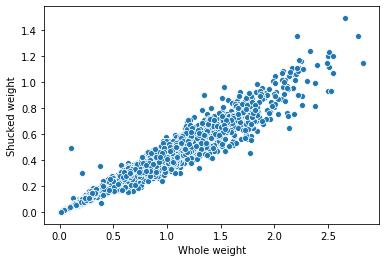

In [25]:
sns.scatterplot(x=abalone_data['Whole weight'], y=abalone_data['Shucked weight'])

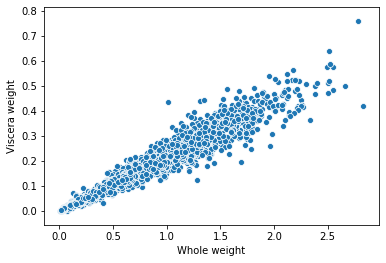

In [26]:
sns.scatterplot(x=abalone_data['Whole weight'], y=abalone_data['Viscera weight'])

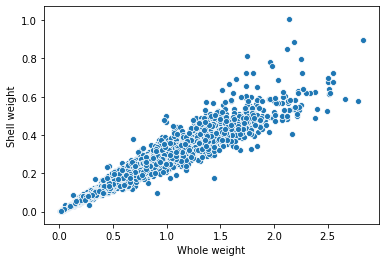

In [27]:
sns.scatterplot(x=abalone_data['Whole weight'], y=abalone_data['Shell weight'])

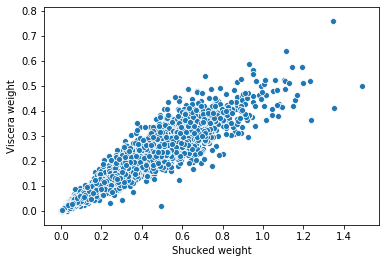

In [28]:
sns.scatterplot(x=abalone_data['Shucked weight'], y=abalone_data['Viscera weight'])

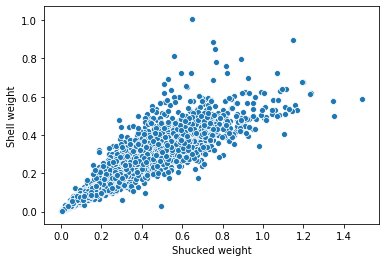

In [29]:
sns.scatterplot(x=abalone_data['Shucked weight'], y=abalone_data['Shell weight'])

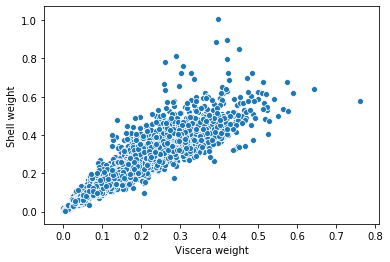

In [30]:
sns.scatterplot(x=abalone_data['Viscera weight'], y=abalone_data['Shell weight'])

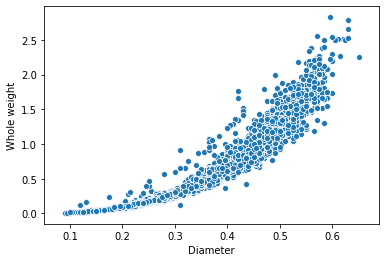

In [31]:
sns.scatterplot(x=abalone_data['Diameter'], y=abalone_data['Whole weight'])

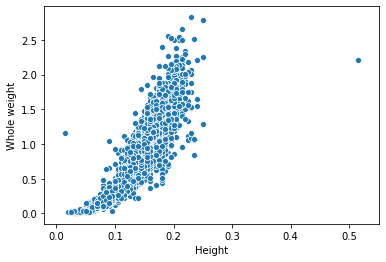

In [32]:
sns.scatterplot(x=abalone_data['Height'], y=abalone_data['Whole weight'])

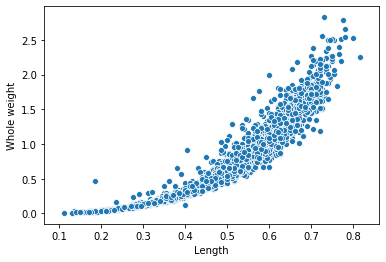

In [33]:
sns.scatterplot(x=abalone_data['Length'], y=abalone_data['Whole weight'])

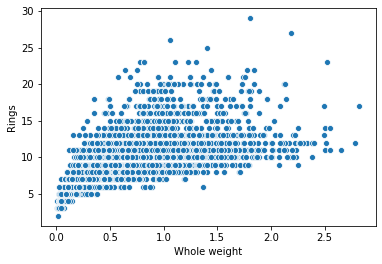

In [34]:
sns.scatterplot(x=abalone_data['Whole weight'], y=abalone_data['Rings'])

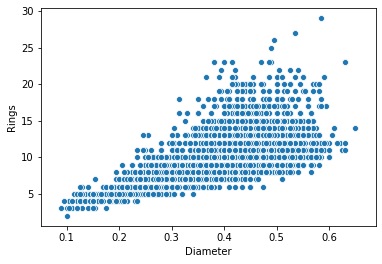

In [35]:
sns.scatterplot(x=abalone_data['Diameter'], y=abalone_data['Rings'])

# One Hot Encoding

In [36]:
abalone_data = pd.concat([abalone_data,pd.get_dummies(abalone_data['Sex'],prefix='d')],axis=1)

In [37]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,d_F,d_I,d_M
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10,1,0,0
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9,1,0,0
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18,0,0,1
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19,1,0,0
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12,0,0,1


In [38]:
abalone_data.shape

(3131, 12)

# Separating Input and Output Variables

In [39]:
X = abalone_data.drop(['Rings','Sex'],axis=1)
y = abalone_data['Rings']

In [40]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,d_F,d_I,d_M
0,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,1,0,0
1,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,1,0,0
2,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,0,0,1
3,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,1,0,0
4,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,0,0,1


In [41]:
#train test split
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42)

In [43]:
print('X_train:,y_train:',X_train.shape,y_train.shape)

X_train:,y_train: (2191, 10) (2191,)


In [44]:
print('X_val:,y_val:',X_val.shape,y_val.shape)

X_val:,y_val: (940, 10) (940,)


# LazyClassifier to get best model for our dataset

In [52]:
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = clf.fit(X_train, X_val, y_train, y_val)
models

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 88%|████████▊ | 38/43 [00:09<00:01,  3.86it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:10<00:00,  4.22it/s]


,R-Squared,RMSE,Time Taken
Model,,,
MLPRegressor,0.53,2.14,2.19
NuSVR,0.51,2.19,0.20
ExtraTreesRegressor,0.51,2.19,0.52
RandomForestRegressor,0.51,2.19,0.90
SVR,0.51,2.19,0.26
ElasticNetCV,0.50,2.21,0.22
OrthogonalMatchingPursuitCV,0.50,2.21,0.03
SGDRegressor,0.50,2.22,0.02
LassoCV,0.50,2.22,0.15


# Model Building

## RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [46]:
from sklearn import metrics
# Model evaluation for training set
y_train_pred = rfc.predict(X_train)
y_train_pred = y_train_pred.astype(int)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['Predicted'] = y_train_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('MAE:  ',metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:  ',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R^2:  ',metrics.r2_score(y_train, y_train_pred))
print("\n")

# Model evaluation for testing set
y_val_pred = rfc.predict(X_val)
y_val_pred = y_val_pred.astype(int)


output = pd.DataFrame(y_val[0:10])
output['Predicted'] = y_val_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Model test performance:")
print("---------------------------")
print('MAE:  ',metrics.mean_absolute_error(y_val, y_val_pred))
print('MSE:  ',metrics.mean_squared_error(y_val, y_val_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_val, y_val_pred)))
print('R^2:  ',metrics.r2_score(y_val, y_val_pred))
print("\n")

      Rings  Predicted  Difference
2092     19         15          -4
2072      9          8          -1
964      12         12           0
2219     10         10           0
2738     10         10           0
247      12         12           0
871       9          9           0
2169      8          9           1
1241      9          9           0
2990     10         10           0 

Model training performance:
---------------------------
MAE:   0.6248288452761296
MSE:   1.018256503879507
RMSE:  1.0090869654690358
R^2:   0.9020145926487827


      Rings  Predicted  Difference
1706      8          7          -1
2549      7          8           1
178      11          9          -2
1502      9          8          -1
2731      9          8          -1
1375      6          6           0
1080      7         11           4
1805      7          8           1
423       7          7           0
926      11         10          -1 

Model test performance:
---------------------------
MAE:   1.5468

# Improve & Optimisation the model

In [73]:
#from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}


estimator = RandomForestRegressor()

model_random = RandomizedSearchCV(estimator = estimator, param_distributions = params, cv = 10, n_iter = 100 ,verbose=2, random_state=0,n_jobs = -1,scoring='neg_mean_squared_error')

model_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [54]:
#model_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 10}

In [55]:
#model_random.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=10, n_estimators=1100)

In [56]:
#model_random.best_score_

-4.773297838299436

In [47]:
#it use best estimator after RandomGridCV
rfc_random = RandomForestRegressor(max_depth=10, min_samples_leaf=10, n_estimators=1100)
rfc_random.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, n_estimators=1100)

In [48]:
from sklearn import metrics
# Model evaluation for training set
y_train_pred = rfc_random.predict(X_train)
y_train_pred = y_train_pred.astype(int)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['Predicted'] = y_train_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('MAE:  ',metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:  ',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R^2:  ',metrics.r2_score(y_train, y_train_pred))
print("\n")

# Model evaluation for testing set
y_val_pred = rfc_random.predict(X_val)
y_val_pred = y_val_pred.astype(int)

output = pd.DataFrame(y_val[0:10])
output['Predicted'] = y_val_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Model test performance:")
print("---------------------------")
print('MAE:  ',metrics.mean_absolute_error(y_val, y_val_pred))
print('MSE:  ',metrics.mean_squared_error(y_val, y_val_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_val, y_val_pred)))
print('R^2:  ',metrics.r2_score(y_val, y_val_pred))
print("\n")

      Rings  Predicted  Difference
2092     19         12          -7
2072      9          8          -1
964      12         13           1
2219     10         10           0
2738     10         10           0
247      12         13           1
871       9         10           1
2169      8         11           3
1241      9         10           1
2990     10         10           0 

Model training performance:
---------------------------
MAE:   1.1976266544956642
MSE:   3.5244180739388407
RMSE:  1.8773433553665244
R^2:   0.6608501499031375


      Rings  Predicted  Difference
1706      8          7          -1
2549      7          8           1
178      11         10          -1
1502      9          8          -1
2731      9          8          -1
1375      6          6           0
1080      7         11           4
1805      7          8           1
423       7          7           0
926      11         11           0 

Model test performance:
---------------------------
MAE:   1.553

# The new Data for Valdition and for Submissions

In [57]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')

In [58]:
test_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,F,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,I,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,I,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,F,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490


In [59]:
test_data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
1039,I,0.270,0.190,0.080,0.0810,0.0265,0.0195,0.030
1040,I,0.520,0.395,0.115,0.6445,0.3155,0.1245,0.186
1041,I,0.480,0.355,0.110,0.4495,0.2010,0.0890,0.140
1042,M,0.665,0.520,0.175,1.3725,0.6060,0.3200,0.395
1043,I,0.530,0.415,0.110,0.5745,0.2525,0.1235,0.189


In [60]:
test_data.shape

(1044, 8)

In [63]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['Sex'],prefix='d')],axis=1)

In [67]:
test_data = test_data.drop(['Sex'],axis=1)

In [68]:
test_data.shape

(1044, 10)

In [69]:
test_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,d_F,d_I,d_M
0,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785,1,0,0
1,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650,0,1,0
2,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900,0,1,0
3,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700,1,0,0
4,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490,1,0,0


# Prediction

## Submission

In [72]:
rings_predict = rfc_random.predict(test_data)

In [73]:
res = pd.DataFrame(rings_predict)
res.index = test_data.index # its important for comparison
res.columns = ["Rings"]
res.to_csv("rings_predict.csv")      # the csv file will be saved locally on the same location where this notebook is located.